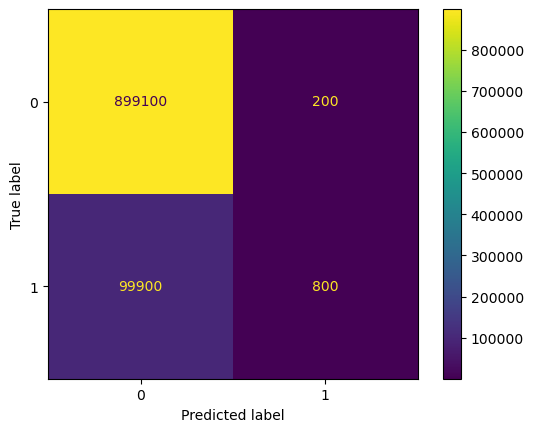

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Initializing
y_true = [0] * 1000000
y_pred = [0] * 1000000
# 10 out of 10,000 tweets are classified as fake, therefore 1,000 out of 1,000,000 tweets are classified as fake
y_pred[0:1000] = [1] * 1000
# 20% of the 1,000 tweets classified as fake by the algorithm are not, thus 200 of these tweets are true and 800 are fake
y_true[0:800] = [1] * 800
# 10% of tweets classified as ”non fake” by the algorithm are, so 99,900 of these 999,000 are actually fake
y_true[1000:100900] = [1] * 99900

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot(values_format='')
plt.show()

In [2]:
money = pd.read_csv("mobile_money.csv")

In [3]:
#Cleaning
df = money[["cellphone", "totexppc", "wkexppc", "wealth", "size", "education_years", "pos", "neg", "ag", "sick",
            "sendd", "recdd", "bank_acct", "mattress", "sacco", "merry", "occ_farmer", "occ_public", "occ_prof",
            "occ_help", "occ_bus", "occ_sales", "occ_ind", "occ_other", "occ_ue", "mpesa_user"]]
df = df.dropna()

#Transforming strings to numeric
from sklearn.preprocessing import LabelEncoder

for col in df.columns:
    if not isinstance(df[col][0], float) and not isinstance(df[col][0], int):
        df[col] = df[col].astype('category')
        le = LabelEncoder()
        le.fit(df[col])
        df[col] = le.transform(df[col])

In [4]:
df[["mpesa_user"]].describe()

,mpesa_user
count,2261.000000
mean,0.737284
std,0.440207
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.groupby("mpesa_user").describe().stack()

cellphone      totexppc        wkexppc        wealth  \
mpesa_user                                                                 
0          count   594.000000  5.940000e+02     594.000000  5.940000e+02   
           mean      0.427609  5.423797e+04   28578.544063  7.647869e+04   
           std       0.495149  9.342726e+04   28099.286689  2.970897e+05   
           min       0.000000  4.800000e+02       0.000000  0.000000e+00   
           25%       0.000000  1.855420e+04   13000.000000  7.062500e+03   
           50%       0.000000  3.113607e+04   20297.335000  2.025000e+04   
           75%       1.000000  5.375650e+04   32844.500000  5.022500e+04   
           max       1.000000  1.576484e+06  237484.000000  4.753200e+06   
1          count  1667.000000  1.667000e+03    1667.000000  1.667000e+03   
           mean      0.922615  8.447676e+04   35493.869666  2.149231e+05   
           std       0.267281  1.029500e+05   27961.784440  1.460980e+06   
           min       0.000000  2.306000e+03    1397.500000  0.000000e+00   
           25%       1.000000  3.441190e+04   18412.625000  2.495000e+04   
           50%       1.000000  5.720400e+04   27726.400000  5.400000e+04   
           75%       1.000000  9.857000e+04   42734.095000  1.126000e+05   
           max       1.000000  1.870776e+06  263380.000000  4.720000e+07   

                         size  education_years          pos          neg  \
mpesa_user                                                                 
0          count   594.000000       594.000000   594.000000   594.000000   
           mean      4.126263         6.489899     0.048822     0.540404   
           std       2.449328         4.624234     0.215676     0.498785   
           min       1.000000         0.000000     0.000000     0.000000   
           25%       2.000000         2.000000     0.000000     0.000000   
           50%       4.000000         7.000000     0.000000     1.000000   
           75%       6.000000        10.000000     0.000000     1.000000   
           max      12.000000        19.000000     1.000000     1.000000   
1          count  1667.000000      1667.000000  1667.000000  1667.000000   
           mean      4.262747         8.373725     0.072585     0.529694   
           std       2.176337         5.287427     0.259533     0.499267   
           min       1.000000         0.000000     0.000000     0.000000   
           25%       3.000000         5.000000     0.000000     0.000000   
           50%       4.000000         9.000000     0.000000     1.000000   
           75%       6.000000        12.000000     0.000000     1.000000   
           max      13.000000        19.000000     1.000000     1.000000   

                           ag         sick        sendd        recdd  \
mpesa_user                                                             
0          count   594.000000   594.000000   594.000000   594.000000   
           mean      0.139731     0.378788     0.198653     0.173401   
           std       0.347000     0.485494     0.399323     0.378912   
           min       0.000000     0.000000     0.000000     0.000000   
           25%       0.000000     0.000000     0.000000     0.000000   
           50%       0.000000     0.000000     0.000000     0.000000   
           75%       0.000000     1.000000     0.000000     0.000000   
           max       1.000000     1.000000     1.000000     1.000000   
1          count  1667.000000  1667.000000  1667.000000  1667.000000   
           mean      0.108578     0.389922     0.615477     0.518296   
           std       0.311203     0.487879     0.486628     0.499815   
           min       0.000000     0.000000     0.000000     0.000000   
           25%       0.000000     0.000000     0.000000     0.000000   
           50%       0.000000     0.000000     1.000000     1.000000   
           75%       0.000000     1.000000     1.000000     1.000000   
           max       1.000000     1.000000     1.000000   

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Train test split
x_train, x_test, y_train, y_test = train_test_split(df[["cellphone", "totexppc", "wkexppc", "wealth", "size",
                                                        "education_years", "pos", "neg", "ag", "sick","sendd",
                                                        "recdd", "bank_acct", "mattress", "sacco", "merry", "occ_farmer",
                                                        "occ_public", "occ_prof", "occ_help", "occ_bus", "occ_sales",
                                                        "occ_ind", "occ_other", "occ_ue"]], df["mpesa_user"],
                                                    test_size = 0.2, random_state = 0)

#Standardizing
scaler = preprocessing.StandardScaler().fit(x_train[["totexppc", "wkexppc", "wealth", "size", "education_years"]])
x_train_to_scale = scaler.transform(x_train[["totexppc", "wkexppc", "wealth", "size", "education_years"]])
x_test_to_scale = scaler.transform(x_test[["totexppc", "wkexppc", "wealth", "size", "education_years"]])

x_train_remainder = x_train[["cellphone", "pos", "neg", "ag", "sick", "sendd", "recdd", "bank_acct",
                        "mattress", "sacco", "merry", "occ_farmer", "occ_public", "occ_prof", "occ_help", "occ_bus",
                        "occ_sales", "occ_ind", "occ_other", "occ_ue"]].to_numpy()
x_test_remainder = x_test[["cellphone", "pos", "neg", "ag", "sick", "sendd", "recdd", "bank_acct", "mattress",
                       "sacco", "merry", "occ_farmer", "occ_public", "occ_prof", "occ_help", "occ_bus",
                       "occ_sales", "occ_ind", "occ_other", "occ_ue"]].to_numpy()

x_train_scaled = np.concatenate((x_train_to_scale, x_train_remainder), axis = 1)
x_test_scaled = np.concatenate((x_test_to_scale, x_test_remainder), axis = 1)

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#Setting up
accuracy_scores = []
auc_scores = []

#Constructing logistic classifier
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(x_train_scaled, y_train)

predictions1 = logit.predict(x_test_scaled)
accuracy1 = accuracy_score(y_test, predictions1)
accuracy_scores.append(accuracy1)

prediction_probs1 = logit.predict_proba(x_test_scaled)
auc1 = roc_auc_score(y_test, prediction_probs1[:,1])
auc_scores.append(auc1)

#Constructing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train_scaled, y_train)

predictions2 = tree.predict(x_test_scaled)
accuracy2 = accuracy_score(y_test, predictions2)
accuracy_scores.append(accuracy2)

prediction_probs2 = tree.predict_proba(x_test_scaled)
auc2 = roc_auc_score(y_test, prediction_probs2[:,1])
auc_scores.append(auc2)

#Constructing random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0)
forest.fit(x_train_scaled, y_train)

predictions3 = forest.predict(x_test_scaled)
accuracy3 = accuracy_score(y_test, predictions3)
accuracy_scores.append(accuracy3)

prediction_probs3 = forest.predict_proba(x_test_scaled)
auc3 = roc_auc_score(y_test, prediction_probs3[:,1])
auc_scores.append(auc3)

In [8]:
print(accuracy_scores)
print(auc_scores)

[0.8233995584988962, 0.7262693156732892, 0.8167770419426048]
[0.8505874060150376, 0.674436090225564, 0.8361842105263159]


In [15]:
coefficients = logit.coef_[0]
coefficients
feature_importance = pd.DataFrame({'Feature': df[["cellphone", "totexppc", "wkexppc", "wealth", "size",
                                                        "education_years", "pos", "neg", "ag", "sick","sendd",
                                                        "recdd", "bank_acct", "mattress", "sacco", "merry", "occ_farmer",
                                                        "occ_public", "occ_prof", "occ_help", "occ_bus", "occ_sales",
                                                        "occ_ind", "occ_other", "occ_ue"]].columns, 'Importance': np.abs(coefficients)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance

,Feature,Importance
5,education_years,2.028699
17,occ_public,1.274710
11,recdd,1.213858
10,sendd,1.034825
12,bank_acct,0.989078
16,occ_farmer,0.744355
13,mattress,0.700066
20,occ_bus,0.330924
19,occ_help,0.316807
22,occ_ind,0.240946


In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#Standardizing entire data set
df_to_scale = scaler.transform(df[["totexppc", "wkexppc", "wealth", "size", "education_years"]])
df_remainder = df[["cellphone", "pos", "neg", "ag", "sick", "sendd", "recdd", "bank_acct",
                   "mattress", "sacco", "merry", "occ_farmer", "occ_public", "occ_prof", "occ_help", "occ_bus",
                   "occ_sales", "occ_ind", "occ_other", "occ_ue"]].to_numpy()
df_scaled = np.concatenate((df_to_scale, df_remainder), axis = 1)

cv_dict = {}

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train_scaled, y_train)
    cross_val_scores = cross_val_score(knn, df_scaled, df["mpesa_user"], cv = 5)
    cross_val_mean = cross_val_scores.mean()
    cv_dict[k] = cross_val_mean
    
cross_val_means = pd.Series(cv_dict, index = list(range(1,11)))
sorted_cross_val_means = cross_val_means.sort_values(ascending = False)
print(sorted_cross_val_means)

9     0.827069
7     0.824858
10    0.820878
8     0.819551
5     0.816461
6     0.810271
3     0.808049
4     0.792130
1     0.761165
2     0.727124
dtype: float64


In [119]:
best_knn = KNeighborsClassifier(n_neighbors = 9)
best_knn.fit(x_train_scaled, y_train)

predictions4 = best_knn.predict(x_test_scaled)
accuracy4 = accuracy_score(y_test, predictions4)
print(accuracy4)

prediction_probs4 = best_knn.predict_proba(x_test_scaled)
auc4 = roc_auc_score(y_test, prediction_probs4[:,1])
print(auc4)

0.7969094922737306
0.8193491541353383
